In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("restaurant.csv")

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [5]:
df.drop(["Unnamed: 0","review_id","user_id","business_id","useful","funny","cool","date"],axis=1,inplace=True)

In [6]:
df.head()

,stars,text
0,5,After getting food poisoning at the Palms hote...
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,The crab legs are better than the ones at Wick...
3,1,Not worth it! Too salty food and expensive! Th...
4,5,I would give this infinite stars if I could. M...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   text    10417 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


In [8]:
df.shape

(10417, 2)

In [9]:
df['stars'].value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

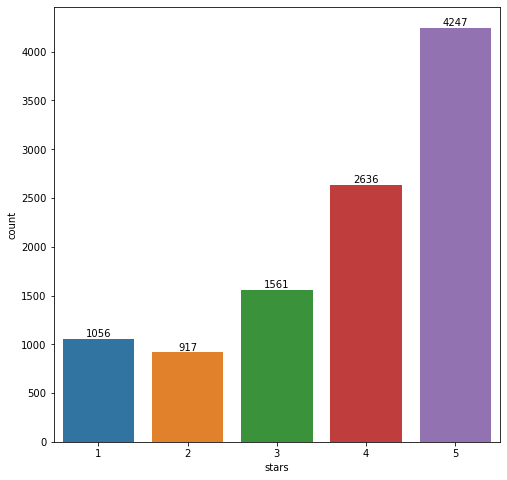

In [10]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["stars"]);
ax.bar_label(ax.containers[0]);

# Sentiment Analysis

In [11]:
df["text"]=df["text"].str.lower()
#küçük harfe çevirdik (yeni değeri = eski değerini küçük harfe çevir.)
df["text"]=df["text"].str.replace("[^\w\s]","") #noktalama işaretlerinin tannımı
#noktalama işaretlerini kaldırdık (yeni değeri = eski değerini noktalama işaretlerini kaldır.)
df["text"]=df["text"].str.replace("\d+","")
#rakamları kaldırdık (yeni değeri = eski değerini rakamları kaldır.)
df["text"]=df["text"].str.replace("\n"," ").replace("\r"," ") #bunun yukardakilerden farkı " " içinde boşluk olmak zorunda
#(yeni değeri = eski değerini Enter ve yeni satır kodlarını kaldırdık)

In [12]:
df.loc[df['stars']==3,"sentiment"]="neutral"
df.loc[df['stars']<3,"sentiment"]="negative"
df.loc[df['stars']>3,"sentiment"]="positive"

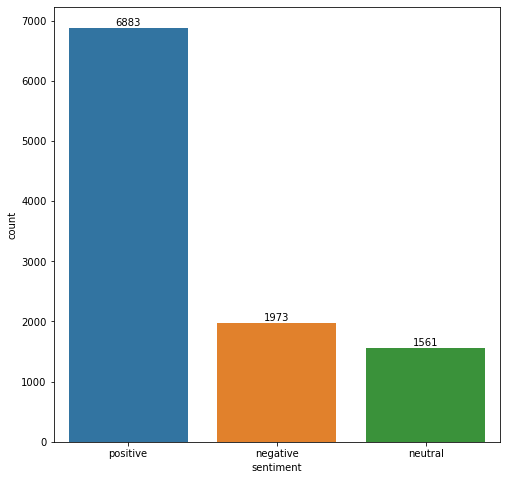

In [13]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["sentiment"]);
ax.bar_label(ax.containers[0]);

In [14]:
df1=df[(df.stars==5) | (df.stars==1)] #1 yıldız verenler ile 5 yıldız verenleri ayırdık (Bir kişinin kötü yorum yazıyorsa önceden anlamamız için)

In [15]:
df.reset_index(drop=True,inplace=True) #index düzgün sıralamayı yapıyor

In [16]:
df

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,4,a feast worthy of gods baccarnal buffet in ca...,positive
2,4,the crab legs are better than the ones at wick...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive
...,...,...,...
10412,5,best buffet ever irma was great served us bett...,positive
10413,4,hollllllyyyy moleyyyy this buffet was one fo...,positive
10414,5,the selection is amazing and all the food is e...,positive
10415,4,one of the best buffets ive had in vegas my on...,positive


In [17]:
vect=CountVectorizer(lowercase=True,ngram_range=(1,1),stop_words="english") # ingilizce gereksiz kelimeleri kaldırdık
x_yeni=vect.fit_transform(df)

In [18]:
x,y=df['text'],df['sentiment']

In [19]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
        
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
        
    #algos=[g,b,SVC,KN,D,R,Log]
    #algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
    
    algos=[b,SVC,KN,D]
    algo_names=['BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier']
    
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False) 

In [20]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(8333,) (2084,) (8333,) (2084,)


,accuracy_score
SVC,0.770633
BernoulliNB,0.690499
DecisionTreeClassifier,0.657869
KNeighborsClassifier,0.655950


In [21]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [22]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

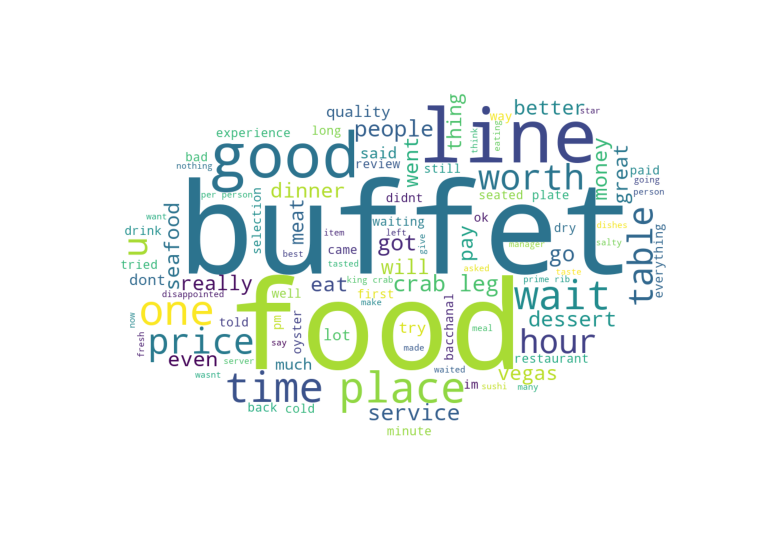

In [23]:
wc(negative_data,'white')

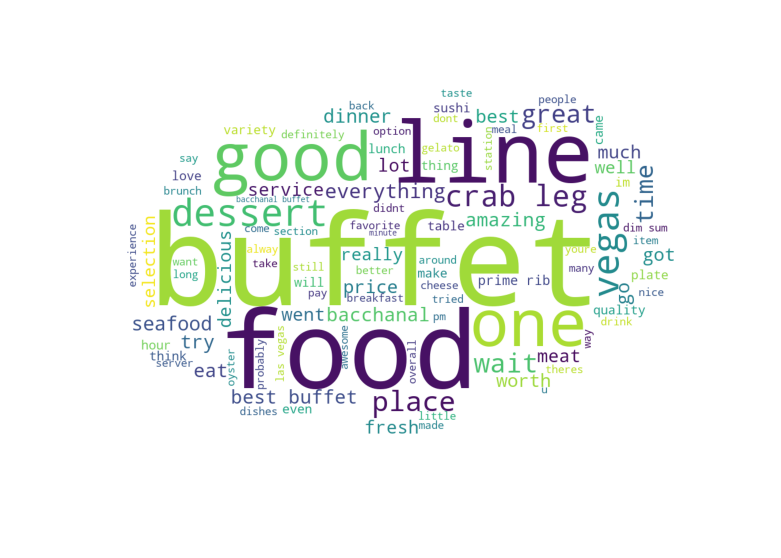

In [24]:
wc(positive_data,'white')

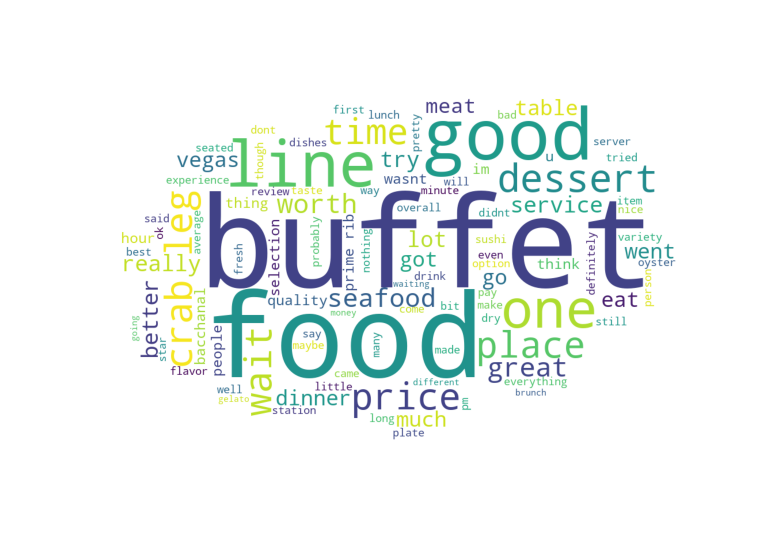

In [25]:
wc(neutral_data,'white')